## Interesting links

In [1]:
#Link1:
#https://medium.com/@ThiyaneshwaranG/top2vec-for-topic-modeling-and-semantic-similarity-and-search-77db82dda7d3
#https://github.com/thiyanesh17/KnowledgeSharing/blob/main/Top2vec__iIdentifying_Abstract_Topics_NLP.ipynb


#Link2:
#https://medium.com/@janhavil1202/understanding-topic-modeling-with-top2vec-cdf58bcd6c09


## Import libraries

In [2]:
""" 
#https://pypi.org/project/top2vec/
pipenv install top2vec
pipenv install top2vec[sentence_transformers]
pipenv install top2vec[sentence_encoders] #if you get error restart kernel and run again
"""

' \n#https://pypi.org/project/top2vec/\npipenv install top2vec\npipenv install top2vec[sentence_transformers]\npipenv install top2vec[sentence_encoders] #if you get error restart kernel and run again\n'

In [3]:
from top2vec import Top2Vec
""" import pandas as pd
import re, string  """
from sklearn.datasets import fetch_20newsgroups

## Read data

In [4]:
'''
Presidential Inaugural Addresses
Context:
Every Presidency starts off with the Inaugural Address. This defines the course for the next 4 years. 
How do the length, word usage, lexical diversity change from President to President? 
https://www.kaggle.com/datasets/adhok93/presidentialaddress?resource=download
'''

'\nPresidential Inaugural Addresses\nContext:\nEvery Presidency starts off with the Inaugural Address. This defines the course for the next 4 years. \nHow do the length, word usage, lexical diversity change from President to President? \nhttps://www.kaggle.com/datasets/adhok93/presidentialaddress?resource=download\n'

In [5]:
""" file_name='inaug_speeches.csv'

df = pd.read_csv('input/' + file_name, encoding= 'latin1')
df.head() """

" file_name='inaug_speeches.csv'\n\ndf = pd.read_csv('input/' + file_name, encoding= 'latin1')\ndf.head() "

In [6]:
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

## Define models

In [7]:
#models comes from two diffrent links mentioned above

model1='distiluse-base-multilingual-cased'

""" model2='universal-sentence-encoder' """

" model2='universal-sentence-encoder' "

## Preprocessing

In [8]:
""" def clean_text(text):

  # Convert to lowercase
  text = text.lower()
  # Removing text in square brackets
  text = re.sub(r'\[.*?\]', ' ', text)
  # Removing punctuation
  text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
  # Removing words containing digits
  text = re.sub('\w*\d\w*', ' ', text)
  # Removing special character '�'
  text = re.sub('�', ' ', text)
  
  return text


# Function to apply cleaning to each text in the DataFrame
def cleaned_text(x):
    result = clean_text(x)
    return result """

" def clean_text(text):\n\n  # Convert to lowercase\n  text = text.lower()\n  # Removing text in square brackets\n  text = re.sub(r'\\[.*?\\]', ' ', text)\n  # Removing punctuation\n  text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)\n  # Removing words containing digits\n  text = re.sub('\\w*\\d\\w*', ' ', text)\n  # Removing special character '�'\n  text = re.sub('�', ' ', text)\n  \n  return text\n\n\n# Function to apply cleaning to each text in the DataFrame\ndef cleaned_text(x):\n    result = clean_text(x)\n    return result "

In [9]:
""" # Apply the function
df["text"] = df["text"].apply(cleaned_text)

df.head(5) """

' # Apply the function\ndf["text"] = df["text"].apply(cleaned_text)\n\ndf.head(5) '

In [10]:
""" # Crop the dataframe
df = df[['Name','text']]
df.head() """

" # Crop the dataframe\ndf = df[['Name','text']]\ndf.head() "

## Train model

In [11]:
umap_args = {'n_neighbors': 10,
             'n_components': 5,
             'metric': 'cosine',
             "random_state": 42}

In [12]:
hdbscan_args = {'min_cluster_size': 10,
                'min_samples':5,
                'metric': 'euclidean',
                'cluster_selection_method': 'eom'}

In [14]:
model = Top2Vec(   documents=newsgroups.data, #chooses a specific column in the df
                   speed='deep-learn', 
                   workers=4, 
                   min_count = 0, 
                   embedding_model=model1,
                   umap_args = umap_args, 
                   hdbscan_args = hdbscan_args
                )

2023-12-28 19:32:03,931 - top2vec - INFO - Pre-processing documents for training
c:\Users\509495\.virtualenvs\venv_top2vec-XyZjzW48\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2023-12-28 19:32:09,116 - top2vec - INFO - Downloading distiluse-base-multilingual-cased model
2023-12-28 19:32:09,957 - top2vec - INFO - Creating joint document/word embedding
2023-12-28 19:47:17,006 - top2vec - INFO - Creating lower dimension embedding of documents
c:\Users\509495\.virtualenvs\venv_top2vec-XyZjzW48\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
2023-12-28 19:47:43,156 - top2vec - INFO - Finding dense areas of documents
2023-12-28 19:47:44,319 - top2vec - INFO - Finding topics


## Results

In [15]:
# Number of topics
model.get_num_topics()

206

In [16]:
# Keywords for each topics
model.topic_words

array([['hockeytipset', 'baseballers', 'baseballs', ..., 'spoilsport',
        'footballs', 'goaltender'],
       ['cosmonautics', 'cosmonauts', 'cosmonaut', ..., 'spacecraf',
        'orbiter', 'cosmospheres'],
       ['ish', 'lai', 'pqz', ..., 'ci', 'cqn', 'ihu'],
       ...,
       ['dermatology', 'dermatologist', 'dermatological', ...,
        'quimioterapia', 'cosmetically', 'osteopathy'],
       ['typefaces', 'typeface', 'typefonts', ..., 'textronics',
        'hypertext', 'typis'],
       ['armenien', 'armeniens', 'armenienne', ..., 'incidents',
        'genocidist', 'azeris']], dtype='<U15')

In [ ]:
""" # Reduce topics if needed
model.hierarchical_topic_reduction(num_topics=10) """

' # Reduce topics if needed\nmodel.hierarchical_topic_reduction(num_topics=10) '

**Word Cloud**

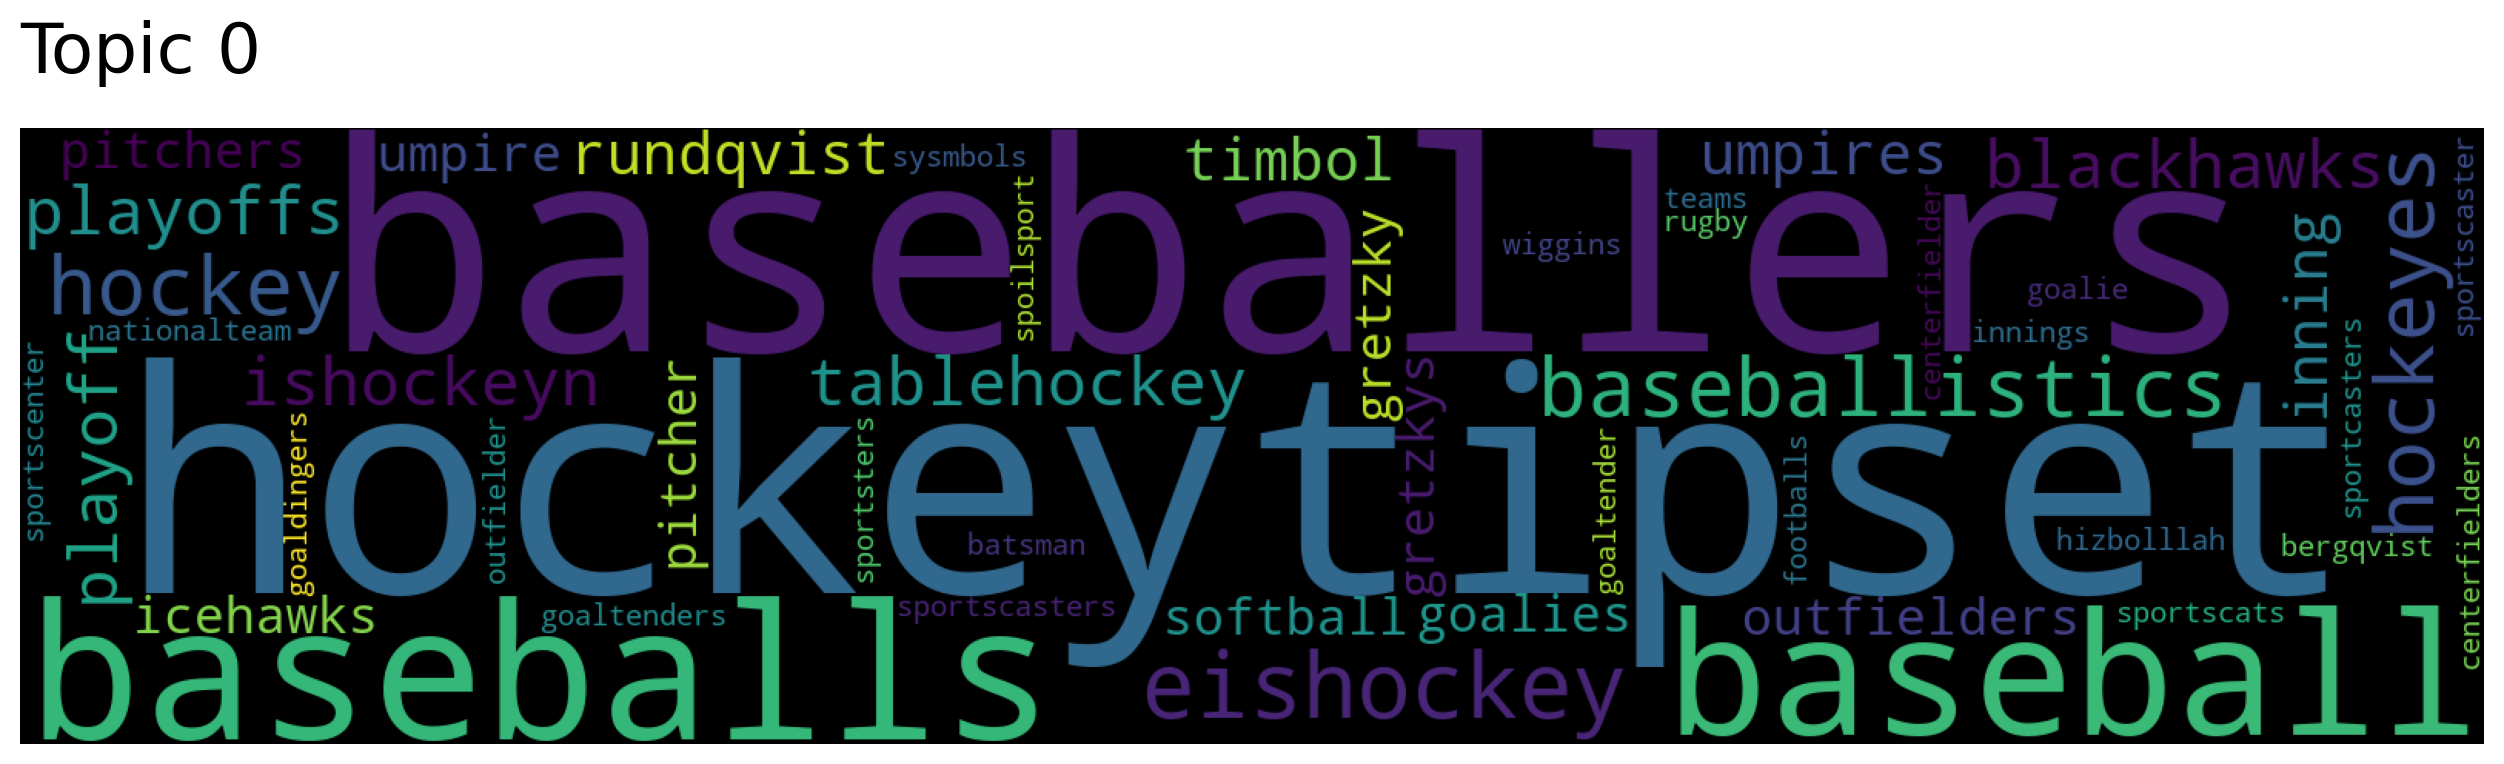

In [17]:
model.generate_topic_wordcloud(0)

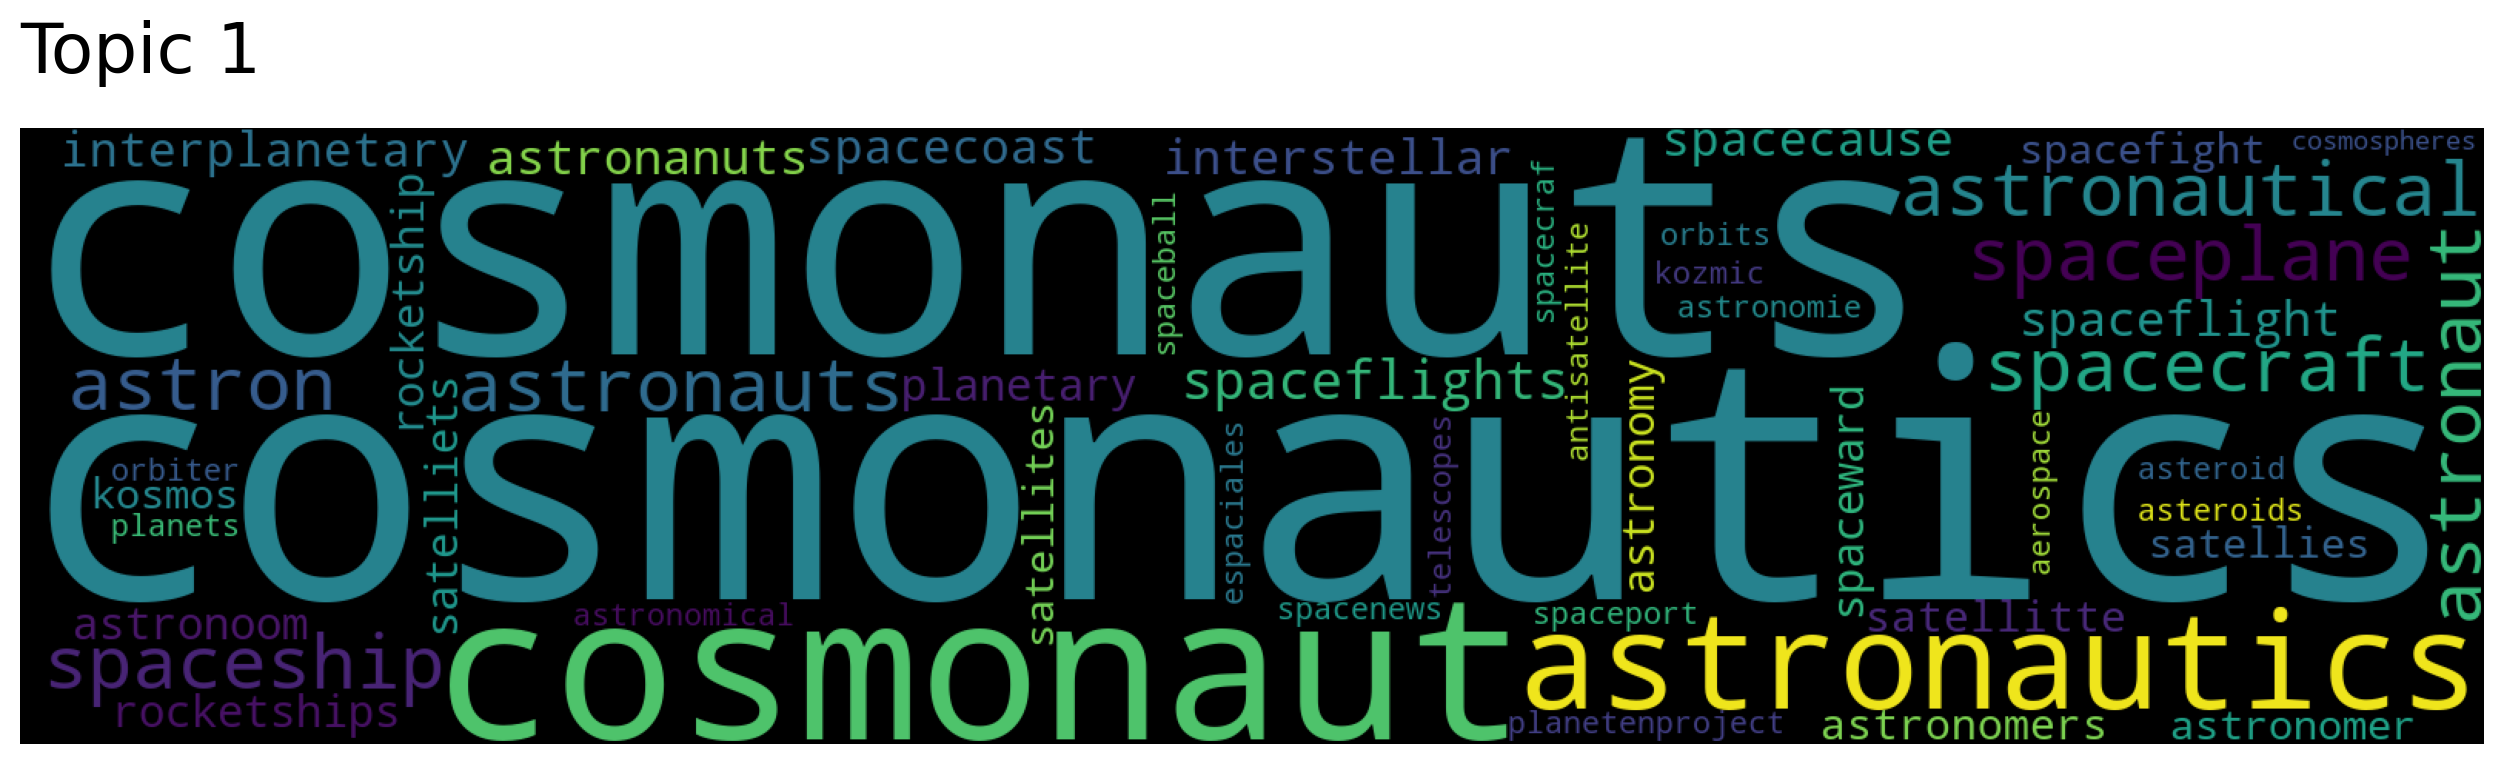

In [18]:
model.generate_topic_wordcloud(1)

## Search topics

In [19]:
""" # search the Topics by Keywords 
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["citizens"], num_topics=2)
print(f"No of topics : {len(topic_nums)} and words are {topic_words[0]}") """

No of topics : 2 and words are ['ish' 'lai' 'pqz' 'de' 'njz' 'tqz' 'ar' 'nd' 'mqe' 'ove' 'tr' 'cqz'
 'sein' 'qktz' 'ette' 'fik' 'las' 'zu' 'nz' 'meg' 'om' 'kytr' 'ki' 'ge'
 'vtv' 'aan' 'ity' 'oz' 'le' 'geb' 'vik' 'en' 'ztg' 'ihc' 'vtjv' 'ozt'
 'eng' 'ksu' 'ta' 'iqe' 'otis' 'knz' 'nkz' 'mot' 'rftz' 'der' 'nyu' 'ci'
 'cqn' 'ihu']


In [20]:
# lets try to get the first topic 
model.get_topics(1)

(array([['hockeytipset', 'baseballers', 'baseballs', 'baseball',
         'eishockey', 'baseballistics', 'hockeyes', 'hockey',
         'tablehockey', 'blackhawks', 'ishockeyn', 'playoffs', 'playoff',
         'rundqvist', 'timbol', 'umpires', 'inning', 'pitchers',
         'goalies', 'pitcher', 'gretzkys', 'umpire', 'gretzky',
         'outfielders', 'softball', 'icehawks', 'sportscasters',
         'hizbolllah', 'goaltenders', 'bergqvist', 'goalie',
         'centerfielders', 'nationalteam', 'wiggins', 'sportscenter',
         'batsman', 'sportscats', 'sysmbols', 'teams', 'innings',
         'sportcasters', 'outfielder', 'goaldingers', 'sportscaster',
         'centerfielder', 'sportsters', 'rugby', 'spoilsport',
         'footballs', 'goaltender']], dtype='<U15'),
 array([[0.34230897, 0.33172864, 0.3296661 , 0.32950932, 0.32239756,
         0.31221405, 0.3102321 , 0.30957288, 0.30413872, 0.30186862,
         0.29671186, 0.29651195, 0.29440328, 0.28634563, 0.2854867 ,
         0.2814

In [21]:
""" # gives the top 20 similarity of the words for the word "Constitutional"
words, word_scores = model.similar_words(keywords=["constitutional"], num_words=20)
for word, score in zip(words, word_scores):
  print (f"{word} {score}") """

constitution 0.9582487902830408
constitutions 0.9397454272371493
uncontitutional 0.8923452897438074
constituting 0.8281721316538371
statutes 0.7704502845069648
statute 0.7622508780533147
legislative 0.742362318817765
ordinance 0.7305589119411672
consititutional 0.7235700137756443
instituting 0.7120262289256215
legislating 0.7100953009232855
statutory 0.7065949526741789
legislate 0.7051505430284541
meclisi 0.702761930858751
decree 0.6954557947515676
legislature 0.6942721689574727
ordinances 0.6923170384481419
legislated 0.6875409931325593
decrees 0.6828985351360146
legislation 0.6816376591782404


## New data

In [22]:
# New data
embedding_vector = model.embed(["I love people from Colombia"])
embedding_vector.shape

(1, 512)

In [ ]:
""" # Reduce number of topics
topic_mapping = model.hierarchical_topic_reduction(num_topics=1)
model.topic_words_reduced[0] """

array(['citizens', 'republic', 'constitutional', 'countrymen',
       'democracy', 'oath', 'nation', 'citizen', 'prosperity', 'freedom',
       'constitution', 'liberty', 'against', 'equal', 'without', 'honor',
       'respect', 'ourselves', 'civil', 'who', 'powers', 'nations',
       'national', 'necessary', 'principles', 'free', 'peace', 'rights',
       'governments', 'government', 'whose', 'individual', 'congress',
       'shall', 'even', 'beyond', 'president', 'every', 'nor', 'each',
       'states', 'under', 'duty', 'both', 'principle', 'strength',
       'greater', 'among', 'itself', 'country'], dtype='<U14')

## Save  and load the model

In [ ]:
""" # Save model
model.save("filename")


# Load model
model = Top2Vec.load("filename") """

' # Save model\nmodel.save("filename")\n\n\n# Load model\nmodel = Top2Vec.load("filename") '

In [ ]:
""" from top2vec import Top2Vec

# Assuming 'newsgroups.data' is a DataFrame column
documents = df['newsgroups.data'].tolist()

# Create a Top2Vec model
model = Top2Vec(
    documents=documents,
    speed='deep-learn',
    workers=4,
    min_count=0,
    embedding_model='distiluse-base-multilingual-cased',
    umap_args=umap_args,
    hdbscan_args=hdbscan_args
)

# New sentence
new_sentence = "Your new sentence goes here."

# Infer the vector for the new sentence
new_sentence_vector = model.infer_vector([new_sentence])

# Get the most similar topics
similar_topics, similarity = model.get_documents_topics([new_sentence_vector], topics=-1)

# Print the most similar topics and their similarity scores
for topic, score in zip(similar_topics[0], similarity[0]):
    print(f"Topic {topic}: Similarity Score {score}")
 """